# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [104]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [73]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selecting the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [74]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [75]:
fraud.shape

(1000000, 8)

#- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?


In [76]:

fraud_trans = fraud["fraud"].value_counts()
fraud_trans


# As the number of fraudulent transaction is very less compared to the non-fraudulent transactions, we can say that the data is imbalanced

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

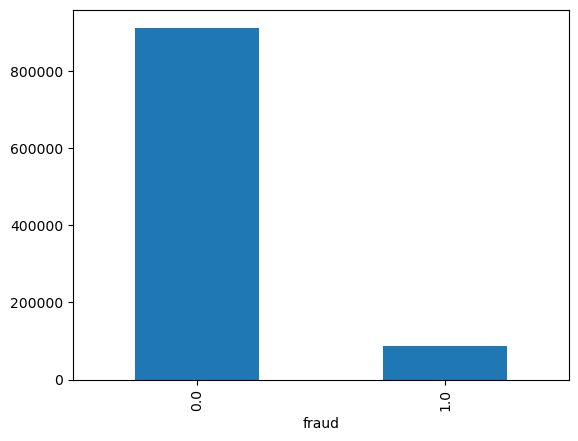

In [77]:
fraud_trans.plot(kind = "bar")
plt.show()

- **2.** Train a LogisticRegression.

In [78]:

features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train , y_test = train_test_split(features, target, random_state = 7)

In [79]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [81]:
log_reg.score(X_test_scaled, y_test)

0.959048

In [82]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228262
         1.0       0.89      0.60      0.72     21738

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



Oversampling

In [83]:
train = pd.DataFrame(X_train_scaled, columns= X_train.columns)

In [84]:
train.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.826709,-0.185796,-0.564915,0.36671,-0.733860,-0.334581,0.732331
1,-0.391950,-0.186634,-0.486978,-2.72695,-0.733860,-0.334581,-1.365502
2,0.284619,-0.170724,-0.439471,0.36671,1.362658,-0.334581,0.732331
3,0.163144,-0.185880,-0.370301,0.36671,1.362658,-0.334581,0.732331
4,-0.305449,0.008377,1.805602,0.36671,1.362658,-0.334581,0.732331


In [85]:
train["fraud"] = y_train.values


In [86]:
fraud_trans = train[train["fraud"]==1]
non_fraud_trans = train[train["fraud"]==0]

In [87]:
fraud_trans_oversampled = resample(fraud_trans,
                                    replace=True,
                                    n_samples = len(non_fraud_trans),
                                    random_state=0)

In [88]:
fraud_trans_oversampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
496750,-0.324297,-0.113648,2.890000,0.36671,1.362658,-0.334581,0.732331,1.0
486016,-0.149526,0.227260,0.932859,0.36671,-0.733860,-0.334581,0.732331,1.0
522694,-0.308819,-0.098277,1.712291,0.36671,-0.733860,-0.334581,0.732331,1.0
241450,-0.353352,-0.024865,1.981250,0.36671,-0.733860,-0.334581,0.732331,1.0
478813,0.796473,15.243709,0.095789,0.36671,-0.733860,-0.334581,0.732331,1.0
...,...,...,...,...,...,...,...,...
399962,0.295948,0.202304,1.783863,0.36671,-0.733860,-0.334581,0.732331,1.0
167995,3.053576,-0.162084,-0.178830,0.36671,-0.733860,-0.334581,0.732331,1.0
249060,-0.396770,-0.186805,0.959723,-2.72695,-0.733860,-0.334581,-1.365502,1.0
718812,-0.257473,-0.057636,0.959273,0.36671,-0.733860,-0.334581,0.732331,1.0


In [89]:
fraud_trans

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
4,-0.305449,0.008377,1.805602,0.36671,1.362658,-0.334581,0.732331,1.0
6,0.160596,-0.125772,1.585179,0.36671,1.362658,-0.334581,0.732331,1.0
28,-0.230200,0.127788,0.791186,0.36671,-0.733860,-0.334581,0.732331,1.0
29,-0.150427,1.697293,1.237049,0.36671,1.362658,-0.334581,0.732331,1.0
48,2.759289,-0.172556,-0.242848,0.36671,-0.733860,-0.334581,0.732331,1.0
...,...,...,...,...,...,...,...,...
749954,-0.357572,-0.147332,0.810327,0.36671,-0.733860,-0.334581,0.732331,1.0
749959,0.148356,-0.171400,1.126069,0.36671,-0.733860,-0.334581,0.732331,1.0
749977,1.309419,-0.087920,-0.051086,0.36671,-0.733860,-0.334581,0.732331,1.0
749986,0.681057,0.045971,1.011416,0.36671,1.362658,-0.334581,0.732331,1.0


In [90]:

train_over = pd.concat([fraud_trans_oversampled,non_fraud_trans])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
496750,-0.324297,-0.113648,2.890000,0.36671,1.362658,-0.334581,0.732331,1.0
486016,-0.149526,0.227260,0.932859,0.36671,-0.733860,-0.334581,0.732331,1.0
522694,-0.308819,-0.098277,1.712291,0.36671,-0.733860,-0.334581,0.732331,1.0
241450,-0.353352,-0.024865,1.981250,0.36671,-0.733860,-0.334581,0.732331,1.0
478813,0.796473,15.243709,0.095789,0.36671,-0.733860,-0.334581,0.732331,1.0
...,...,...,...,...,...,...,...,...
749994,-0.209981,-0.104439,-0.101160,0.36671,1.362658,-0.334581,0.732331,0.0
749995,0.020891,-0.074729,0.076732,0.36671,-0.733860,-0.334581,0.732331,0.0
749996,0.258018,0.254164,-0.522726,0.36671,1.362658,-0.334581,0.732331,0.0
749997,-0.221313,-0.178838,-0.498441,0.36671,-0.733860,-0.334581,0.732331,0.0


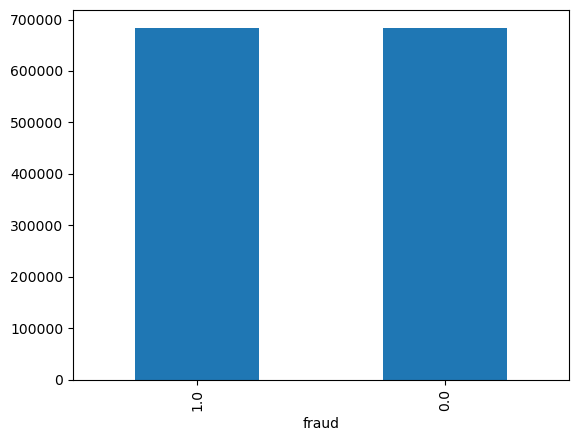

In [91]:
fraud_trans_plt= train_over["fraud"].value_counts()
fraud_trans_plt.plot(kind = "bar")
plt.show()

In [92]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]
display(X_train_over)
y_train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
496750,-0.324297,-0.113648,2.890000,0.36671,1.362658,-0.334581,0.732331
486016,-0.149526,0.227260,0.932859,0.36671,-0.733860,-0.334581,0.732331
522694,-0.308819,-0.098277,1.712291,0.36671,-0.733860,-0.334581,0.732331
241450,-0.353352,-0.024865,1.981250,0.36671,-0.733860,-0.334581,0.732331
478813,0.796473,15.243709,0.095789,0.36671,-0.733860,-0.334581,0.732331
...,...,...,...,...,...,...,...
749994,-0.209981,-0.104439,-0.101160,0.36671,1.362658,-0.334581,0.732331
749995,0.020891,-0.074729,0.076732,0.36671,-0.733860,-0.334581,0.732331
749996,0.258018,0.254164,-0.522726,0.36671,1.362658,-0.334581,0.732331
749997,-0.221313,-0.178838,-0.498441,0.36671,-0.733860,-0.334581,0.732331


496750    1.0
486016    1.0
522694    1.0
241450    1.0
478813    1.0
         ... 
749994    0.0
749995    0.0
749996    0.0
749997    0.0
749999    0.0
Name: fraud, Length: 1368670, dtype: float64

In [93]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [94]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\shyam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    228262
         1.0       0.57      0.95      0.71     21738

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [ ]:

# After oversampling the recall rate for fraud has increased from 0.60 to 0.95. 
# Hence, correctly predicting the instances of actual fraud-and non fraud cases more number of times

Undersample

In [95]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.826709,-0.185796,-0.564915,0.36671,-0.733860,-0.334581,0.732331,0.0
1,-0.391950,-0.186634,-0.486978,-2.72695,-0.733860,-0.334581,-1.365502,0.0
2,0.284619,-0.170724,-0.439471,0.36671,1.362658,-0.334581,0.732331,0.0
3,0.163144,-0.185880,-0.370301,0.36671,1.362658,-0.334581,0.732331,0.0
4,-0.305449,0.008377,1.805602,0.36671,1.362658,-0.334581,0.732331,1.0
...,...,...,...,...,...,...,...,...
749995,0.020891,-0.074729,0.076732,0.36671,-0.733860,-0.334581,0.732331,0.0
749996,0.258018,0.254164,-0.522726,0.36671,1.362658,-0.334581,0.732331,0.0
749997,-0.221313,-0.178838,-0.498441,0.36671,-0.733860,-0.334581,0.732331,0.0
749998,-0.410210,-0.187236,0.872531,-2.72695,-0.733860,-0.334581,0.732331,1.0


In [96]:
non_fraud_trans_undersampled = resample(non_fraud_trans,
                                        replace = False,
                                        n_samples= len(fraud_trans),
                                        random_state=0)
non_fraud_trans_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
583766,-0.289046,-0.162189,0.005766,0.36671,1.362658,2.988810,0.732331,0.0
596655,-0.285814,-0.146936,-0.191814,0.36671,1.362658,2.988810,0.732331,0.0
712828,0.950834,-0.151220,-0.264746,0.36671,1.362658,2.988810,0.732331,0.0
574993,1.679550,-0.155620,-0.539637,0.36671,-0.733860,2.988810,0.732331,0.0
79380,-0.221892,-0.156311,-0.020809,0.36671,-0.733860,-0.334581,-1.365502,0.0
...,...,...,...,...,...,...,...,...
35254,-0.404813,-0.111754,0.131404,-2.72695,1.362658,-0.334581,-1.365502,0.0
630296,-0.229864,-0.127273,-0.006068,0.36671,-0.733860,-0.334581,0.732331,0.0
408523,-0.403926,0.069489,-0.395152,-2.72695,-0.733860,-0.334581,0.732331,0.0
494042,-0.254210,-0.184781,-0.354995,0.36671,1.362658,-0.334581,-1.365502,0.0


In [98]:
train_under = pd.concat([non_fraud_trans_undersampled, fraud_trans])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
583766,-0.289046,-0.162189,0.005766,0.36671,1.362658,2.988810,0.732331,0.0
596655,-0.285814,-0.146936,-0.191814,0.36671,1.362658,2.988810,0.732331,0.0
712828,0.950834,-0.151220,-0.264746,0.36671,1.362658,2.988810,0.732331,0.0
574993,1.679550,-0.155620,-0.539637,0.36671,-0.733860,2.988810,0.732331,0.0
79380,-0.221892,-0.156311,-0.020809,0.36671,-0.733860,-0.334581,-1.365502,0.0
...,...,...,...,...,...,...,...,...
749954,-0.357572,-0.147332,0.810327,0.36671,-0.733860,-0.334581,0.732331,1.0
749959,0.148356,-0.171400,1.126069,0.36671,-0.733860,-0.334581,0.732331,1.0
749977,1.309419,-0.087920,-0.051086,0.36671,-0.733860,-0.334581,0.732331,1.0
749986,0.681057,0.045971,1.011416,0.36671,1.362658,-0.334581,0.732331,1.0


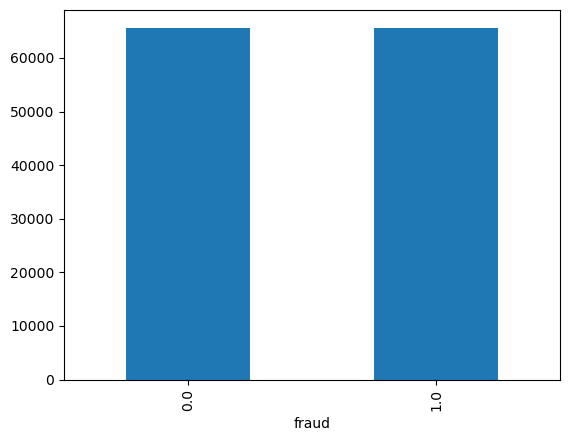

In [100]:
fraud_trans_plt= train_under["fraud"].value_counts()
fraud_trans_plt.plot(kind = "bar")
plt.show()

In [101]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [102]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [103]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\shyam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228262
         1.0       0.57      0.95      0.71     21738

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [ ]:
#We can see that the undersampling has same effect on the imbalanced data as oversampling. 
# Therefore, correctly predicting the instances of actual fraud-and non fraud cases more number of times

### SMOTE

In [105]:
sm = SMOTE(random_state= 1, sampling_strategy = 1.0)

In [109]:
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [110]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [111]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    228262
         1.0       0.57      0.95      0.71     21738

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [ ]:
# With imbalance in the given data, the recall for fraud is low. But after balancing the recall for the fraud and non-fraud cases improves significantly. 
# Thus correctly predicting the instances of actual fraud-and non fraud cases more number of times